# Explore here

In [473]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import tree  

In [474]:
df_housing = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [475]:
X = df_housing[['Latitude','Longitude','MedInc']]
X.head()


,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


# Splitting the dataset

In [476]:
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

In [477]:
X_test.head()

,Latitude,Longitude,MedInc
20046,36.06,-119.01,1.6812
3024,35.14,-119.46,2.5313
15663,37.80,-122.44,3.4801
20484,34.28,-118.72,5.7376
9814,36.62,-121.93,3.7250


In [478]:
X_train.shape

(16512, 3)

# Normalization

In [479]:
data_normalization = preprocessing.scale(X, axis=0)
data_normalization

array([[ 1.05254828, -1.32783522,  2.34476576],
       [ 1.04318455, -1.32284391,  2.33223796],
       [ 1.03850269, -1.33282653,  1.7826994 ],
       ...,
       [ 1.77823747, -0.8237132 , -1.14259331],
       [ 1.77823747, -0.87362627, -1.05458292],
       [ 1.75014627, -0.83369581, -0.78012947]])

In [480]:
pca_model = PCA(n_components=2)

In [481]:
data_visualization = pca_model.fit_transform(X)

In [482]:
data_visualization

array([[ 3.26583206,  4.61584546],
       [ 3.24540791,  4.59173526],
       [ 3.29602589,  3.5539484 ],
       ...,
       [ 3.99340033, -2.10623045],
       [ 4.05436184, -1.93100809],
       [ 3.93389379, -1.41729769]])

In [483]:
data_visualization.shape

(20640, 2)

# Data Visualization

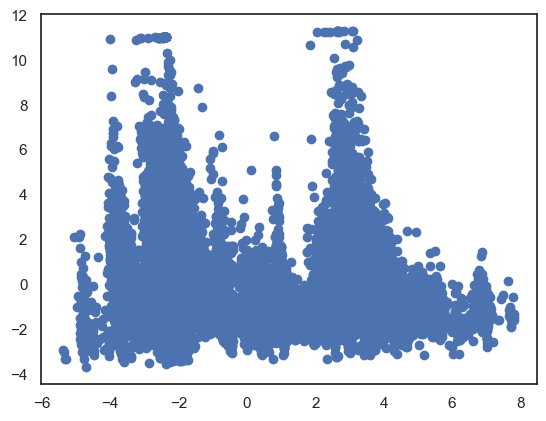

In [484]:

plt.scatter(data_visualization[:,0],data_visualization[:,1])
plt.savefig("/Users/nandapop/Documents/Bootcamp/K-means/data/processed/data_visualization.png")
plt.show()

In [485]:
clustering_model = KMeans(n_clusters = 3)
clustering_model.fit(X_train)

/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [486]:
X_train["Target"] = clustering_model.labels_
X_train.head()

,Latitude,Longitude,MedInc,Target
14196,32.71,-117.03,3.2596,0
8267,33.77,-118.16,3.8125,0
17445,34.66,-120.48,4.1563,0
14265,32.69,-117.11,1.9425,0
2271,36.78,-119.80,3.5542,1


In [487]:
data_normalization = preprocessing.scale(X_train.drop("Target", axis=1), axis=0)
pca_model = PCA(n_components=2)
data_visualization = pca_model.fit_transform(data_normalization)
pca_train= pd.DataFrame(data_visualization, columns=['PC1', 'PC2'])


In [488]:
data_visualization

array([[-1.8539089 , -0.405118  ],
       [-1.11876939, -0.07832147],
       [-0.01649009,  0.1894366 ],
       ...,
       [-0.93432834, -0.53096182],
       [ 1.43351093,  1.04335752],
       [ 1.733307  , -0.58433896]])

# Plotting the results

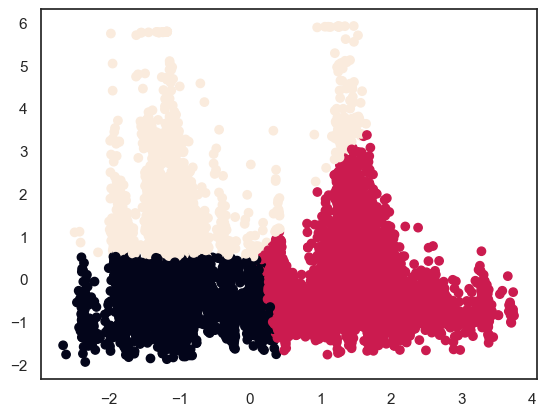

In [489]:

plt.scatter(data_visualization[:,0],data_visualization[:,1], c= X_train['Target'])
plt.savefig("/Users/nandapop/Documents/Bootcamp/K-means/data/processed/results.png")
plt.show()

In [490]:
test_label = clustering_model.predict(X_test)
#clustering_model.fit(X_train)

In [491]:
X_test['Target'] = test_label

In [492]:
X_test.head()

,Latitude,Longitude,MedInc,Target
20046,36.06,-119.01,1.6812,0
3024,35.14,-119.46,2.5313,0
15663,37.80,-122.44,3.4801,1
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,1


# Creating multiple Clusters

In [493]:
for k in range(1,6):
    clustering_model = KMeans(n_clusters=k)
    clustering_model.fit(X_train)
    X_train[f'Target_{k}'] = clustering_model.labels_

/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default valu

In [494]:
X_train

,Latitude,Longitude,MedInc,Target,Target_1,Target_2,Target_3,Target_4,Target_5
14196,32.71,-117.03,3.2596,0,0,1,1,0,2
8267,33.77,-118.16,3.8125,0,0,1,1,0,2
17445,34.66,-120.48,4.1563,0,0,1,1,0,2
14265,32.69,-117.11,1.9425,0,0,1,1,0,2
2271,36.78,-119.80,3.5542,1,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...
11284,33.78,-117.96,6.3700,2,0,1,0,2,3
11964,34.02,-117.43,3.0500,0,0,1,1,0,2
5390,34.03,-118.38,2.9344,0,0,1,1,0,2
860,37.58,-121.96,5.7192,1,0,0,2,3,0


In [495]:
k = 6
clustering_model = KMeans(n_clusters=k, random_state=42)
clustering_model.fit(data_visualization)
cluster_labels = clustering_model.labels_
pca_train['Cluster'] = cluster_labels

/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


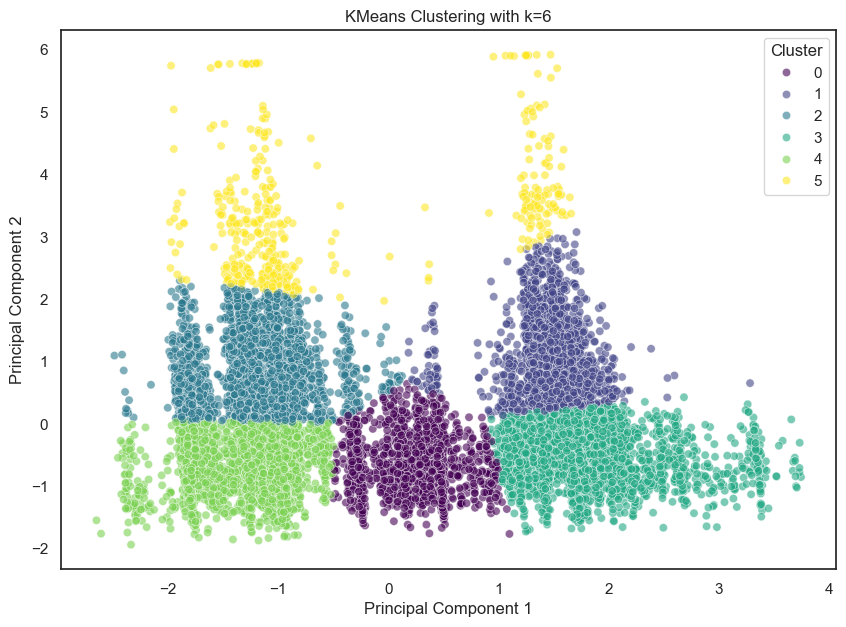

In [496]:
sns.set_theme(style="white")
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_train, legend='full',alpha=0.6)
plt.title(f'KMeans Clustering with k={k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig("/Users/nandapop/Documents/Bootcamp/K-means/data/processed/multi_clusters.png")
plt.show()